<a href="https://colab.research.google.com/github/BhanuSrihridai/British-Airways/blob/Development/British_airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk


In [22]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages=10
page_size=100

reviews=[]

for i in range(1,pages+1):

    print(f"Scraping page {i}")

    # Creating url from a page to collect data
    # url = https://www.airlinequality.com/airline-reviews/british-airways/page/2/?sortby=post_date%3ADesc&pagesize=100

    url=f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")




Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.sample(10)

,reviews
876,✅ Trip Verified | I was seated right next to t...
303,✅ Trip Verified | This is my first time flying...
293,Not Verified | LHR-LAX. I prefer the Boeing 7...
508,✅ Trip Verified | An ordinary BA domestic shu...
716,✅ Trip Verified | Hyderabad to San Francisco ...
442,"✅ Trip Verified | Very old planes, poor food ..."
51,"Not Verified | The worst service ever, my bag..."
980,✅ Trip Verified | BA836 on 19 Jan. Excellent ...
793,✅ Trip Verified | The seating configuration m...
865,✅ Trip Verified | London to Delhi. A truly fi...


In [33]:
df.to_csv("C:\Data Science\Internship\British Airways\British Airways.csv")


In [125]:
df=pd.read_csv("British Airways.csv")

# **Data Cleaning**

Checking for null values

In [127]:
df.isnull().sum()

Unnamed: 0    0
reviews       0
dtype: int64

Removing the punctuation

In [128]:
df['review_processed'] = df['reviews'].str.replace("[^a-zA-Z0-9]", " ")


<ipython-input-128-91d5aada4604>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_processed'] = df['reviews'].str.replace("[^a-zA-Z0-9]", " ")


In [129]:
df["review_processed"]

0        Trip Verified    Booked online months ago an...
1        Trip Verified    The flight was on time  The...
2      Not Verified    Angry  disappointed  and unsat...
3        Trip Verified    As an infrequent flyer  Bri...
4      Not Verified    A totally unremarkable flight ...
                             ...                        
995      Trip Verified    San Francisco to London  Te...
996      Trip Verified    Heathrow to Vancouver  The ...
997      Trip Verified    London to Bucharest  First ...
998      Trip Verified    I forgot I had purchased a ...
999      Trip Verified    When the passenger in front...
Name: review_processed, Length: 1000, dtype: object

Creating a column for trip verifcation

In [130]:
# def trip_verification(row):

#   words = row.split()
#   for word in words :
#     first_two_words=' '.join(words[:2])
#     return first_two_words

In [ ]:
# df['Trip Verification'] = df['review_processed'].apply(lambda row: trip_verification(row))
# df.head()

Or simply we can use join method as below

In [131]:
# df['Trip Verification']=df['review_processed'].apply(lambda row: 'Trip Verified' if 'Trip Verfied' in row else 'Not Verified')
df['Trip Verification'] = df['review_processed'].apply(lambda row: ' '.join(row.split()[:2]) )
df['review_processed'] = df['review_processed'].apply(lambda row: ' '.join(row.split()[2:]) )    # Removing verification tag from the review
df.head()

,Unnamed: 0,reviews,review_processed,Trip Verification
0,0,✅ Trip Verified | Booked online months ago an...,Booked online months ago and the only hitch wa...,Trip Verified
1,1,✅ Trip Verified | The flight was on time. The...,The flight was on time The crew were polite It...,Trip Verified
2,2,"Not Verified | Angry, disappointed, and unsat...",Angry disappointed and unsatisfied My route wa...,Not Verified
3,3,"✅ Trip Verified | As an infrequent flyer, Bri...",As an infrequent flyer British Airways was alw...,Trip Verified
4,4,"Not Verified | A totally unremarkable flight,...",A totally unremarkable flight on time as comfo...,Not Verified


In [132]:
cols=['Unnamed: 0','reviews']
df=df.drop(columns=cols)
df.head()

,review_processed,Trip Verification
0,Booked online months ago and the only hitch wa...,Trip Verified
1,The flight was on time The crew were polite It...,Trip Verified
2,Angry disappointed and unsatisfied My route wa...,Not Verified
3,As an infrequent flyer British Airways was alw...,Trip Verified
4,A totally unremarkable flight on time as comfo...,Not Verified


Replacing the shorter words with space

In [133]:
df['review_processed']=df['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['review_processed']


0      Booked online months ago and the only hitch wa...
1      The flight was time The crew were polite was t...
2      Angry disappointed and unsatisfied route was f...
3      infrequent flyer British Airways was always fi...
4      totally unremarkable flight time comfortable E...
                             ...                        
995    San Francisco London Terrible service and food...
996    Heathrow Vancouver The seats booked not given ...
997    London Bucharest First class ground staff but ...
998    forgot had purchased hand baggage only fare th...
999    When the passenger front reclines his her seat...
Name: review_processed, Length: 1000, dtype: object

Converting all words into lower case

In [134]:
df['review_processed']=[row.lower() for row in df['review_processed']]
df['review_processed']

0      booked online months ago and the only hitch wa...
1      the flight was time the crew were polite was t...
2      angry disappointed and unsatisfied route was f...
3      infrequent flyer british airways was always fi...
4      totally unremarkable flight time comfortable e...
                             ...                        
995    san francisco london terrible service and food...
996    heathrow vancouver the seats booked not given ...
997    london bucharest first class ground staff but ...
998    forgot had purchased hand baggage only fare th...
999    when the passenger front reclines his her seat...
Name: review_processed, Length: 1000, dtype: object

Removing the stop words

In [135]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [194]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# Making custom list of words to be removed
# add_words = ['movie','film','one','make','even','see','movies','get','makes','making','time','watch','character', 'like', 'good','well','would','really']

# Adding to the list of words
# stop_words.extend(add_words)

# Function to remove stop words
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [195]:
def remove_stopwords(rev):
    # input : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

In [148]:
review_tokenized = word_tokenize(df['review_processed'][0])

rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])

rev_new

'booked online months ago hitch replacement aircraft meaning chosen seats different informed prior departure could amend bag drop man smooth suspect man fault shuttle boarding slow delayed meaning rush lhr cpt full left less cabin clean expected sufficient leg arm room plus little perks drinks complaint seats actually recline far staff good first hours service especially george food quite tasty option loaded breakfast also quite tasty landed fly ointment cases arrived late carousel later notice broken likely cpt pleasant surprise'

In [204]:
df['review_processed']=[remove_stopwords(r) for r in df['review_processed']]

In [205]:
df['review_processed']

0      book online month ago hitch replacement aircra...
1      crew polite story outward find europe generall...
2      angry disappoint unsatisfied route london atla...
3      infrequent flyer british airway always first c...
4      totally unremarkable comfortable european conf...
                             ...                        
995    san francisco london terrible service food cra...
996    heathrow vancouver seat book give take month r...
997    london bucharest first class ground staff air ...
998    forgot purchase hand baggage fare airport char...
999    passenger front reclines seat make difficult s...
Name: review_processed, Length: 1000, dtype: object

Lemmatisation

In [198]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [206]:
lemmatiser = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ

  elif nltk_tag.startswith('V'):
    return wordnet.VERB

  elif nltk_tag.startswith('N'):
      return wordnet.NOUN

  elif nltk_tag.startswith('R'):
      return wordnet.ADV
  else:
      return None


In [207]:
def lemmatize_sentence(sentence):

  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))

  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)

  lemmatized_sentence = []

  for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatiser.lemmatize(word, tag))

  return " ".join(lemmatized_sentence)

df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))


In [201]:
df['review_processed']

0      book online month ago hitch replacement aircra...
1      crew polite story outward find europe generall...
2      angry disappoint unsatisfied route london atla...
3      infrequent flyer british airway always first c...
4      totally unremarkable comfortable european conf...
                             ...                        
995    san francisco london terrible service food cra...
996    heathrow vancouver seat book give take month r...
997    london bucharest first class ground staff air ...
998    forgot purchase hand baggage fare airport char...
999    passenger front reclines seat make difficult s...
Name: review_processed, Length: 1000, dtype: object

Plotting frequent words


<Axes: xlabel='count', ylabel='word'>

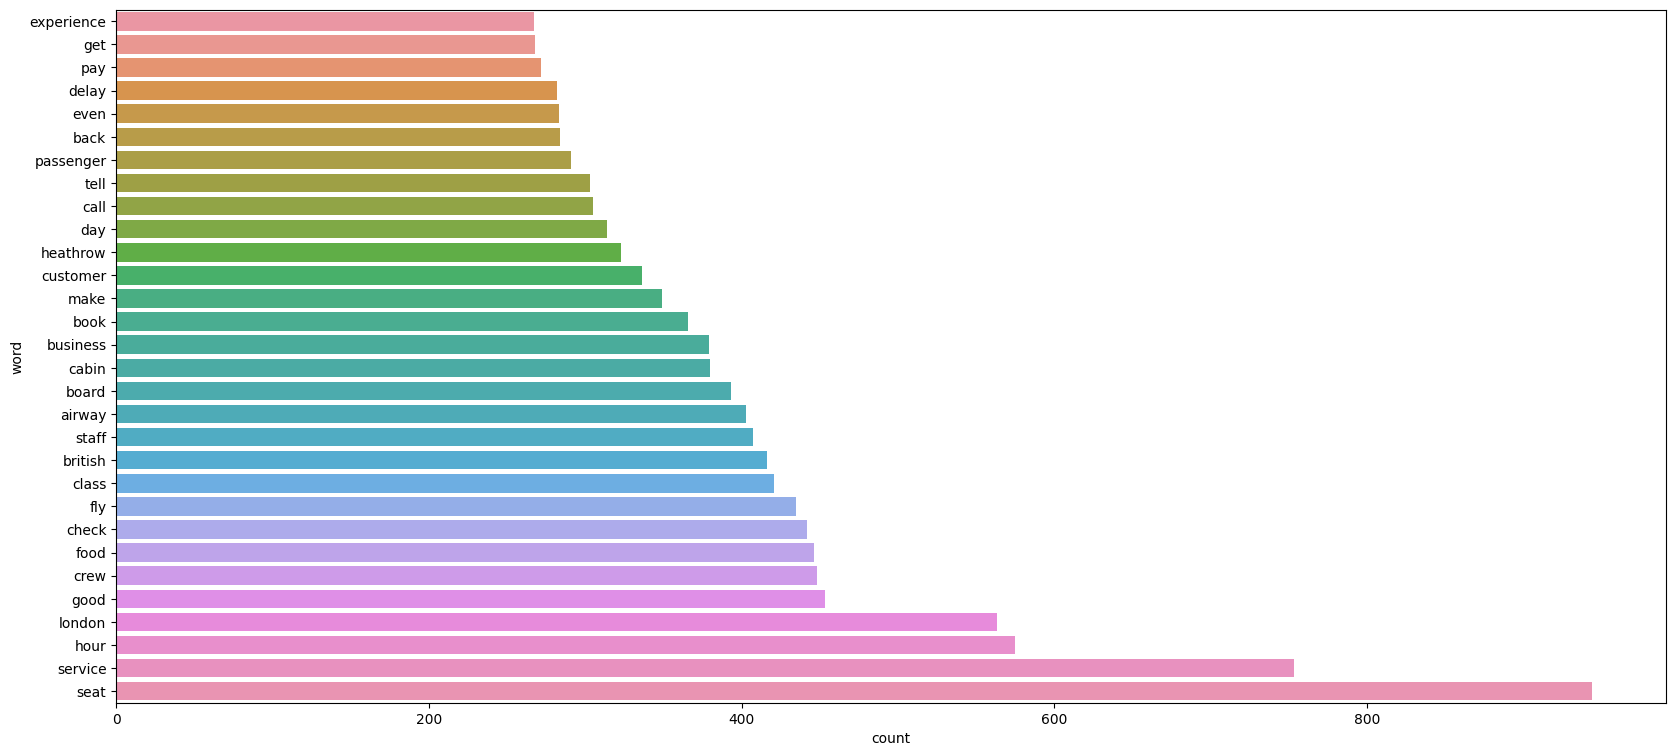

In [208]:
import seaborn as sns
from nltk import FreqDist
import matplotlib.pyplot as plt

#Extracts words into list and count frequency
all_words = ' '.join([text for text in df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30)

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,9))
# ax = plt.barh(words_df['word'], width = words_df['count'])
# plt.show()

sns.barplot(y=words_df['word'],x=words_df['count'])


Word Cloud

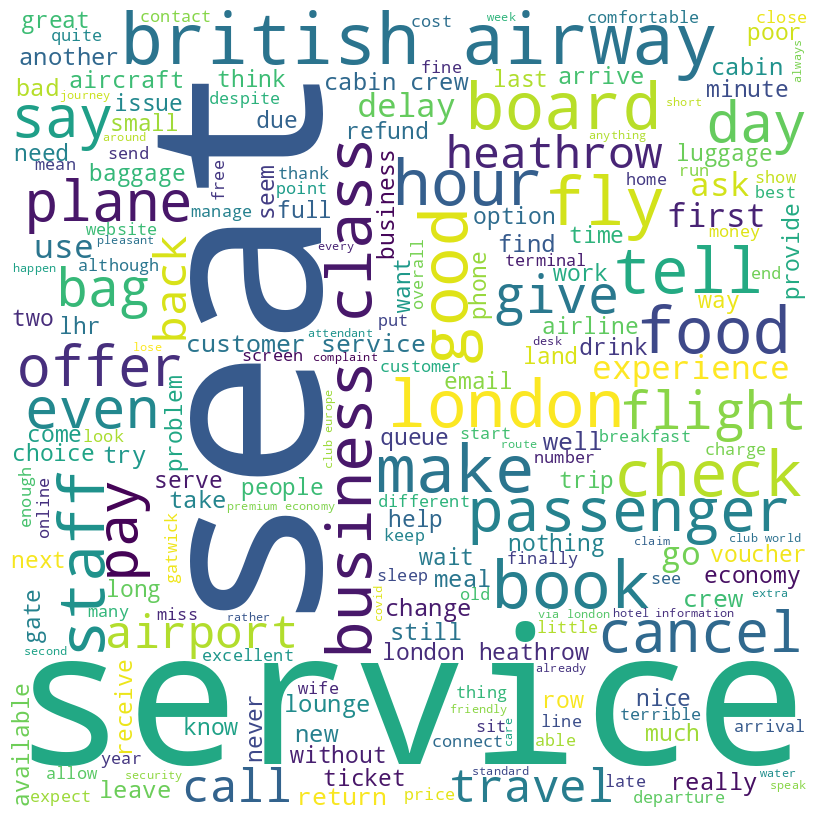

In [209]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['review_processed']])

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Updating the stop words.




In [ ]:
add_words = ['british', 'airway','airway','airways', 'flight', 'get', 'airline', 'would', 'take', 'give', 'one', 'time','fly']
stop_words.extend(add_words)

# df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]
# df.head()
stop_words

In [184]:
all_words = ' '.join([text for text in df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

wrds=list(words_df.keys())
wrds.sort()
wrds

['000',
 '0038',
 '00am',
 '00pm',
 '0103',
 '0120',
 '0200',
 '0445',
 '0510',
 '05pm',
 '0600',
 '0650',
 '0757',
 '0800',
 '0915',
 '100',
 '1000',
 '10000',
 '1000each',
 '100s',
 '100th',
 '1025',
 '10am',
 '10hr',
 '10hrs',
 '10min',
 '10pm',
 '10x',
 '110',
 '1100',
 '1125',
 '112km',
 '115',
 '1155pm',
 '116',
 '1189',
 '11am',
 '11d',
 '11f',
 '11h',
 '11th',
 '1200',
 '1215',
 '125',
 '126',
 '127',
 '1279',
 '12d',
 '12e',
 '12f',
 '12h',
 '12j',
 '12th',
 '1300',
 '1330',
 '1330hrs',
 '135km',
 '13e',
 '13hr',
 '13th',
 '1400',
 '1410',
 '1430',
 '14pm',
 '14th',
 '150',
 '1500',
 '159',
 '15am',
 '15c',
 '15cms',
 '15d',
 '15m',
 '15mins',
 '15pm',
 '15th',
 '160',
 '168',
 '16th',
 '170',
 '173',
 '1730pm',
 '174',
 '17inch',
 '17th',
 '180',
 '1835',
 '187',
 '18th',
 '1900',
 '1930',
 '1940',
 '197',
 '1970',
 '1980',
 '19th',
 '1hour',
 '1hr',
 '1hr5min',
 '1pm',
 '1st',
 '200',
 '2000',
 '2002',
 '2004',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 